<a href="https://colab.research.google.com/github/purva382/Projects/blob/master/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Purva Rakesh Bali**

Data Science and Business Analytics Task

Topic- To Explore Business Analytics

Task No.5- Perform 'Exploratory Data Analysis' on the provided dataset 'SampleSuperstore'

Dataset- https://bit.ly/3i4rbWI

In [ ]:
from google.colab import drive
drive.mount("/gdrive")

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv(r"/gdrive/My Drive/Project/SampleSuperstore.csv")

In [ ]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.shape

(9994, 13)

In [ ]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [ ]:
numerical_feature= [ col for col in df.columns if df[col].dtypes!="O"]

In [ ]:
df[numerical_feature].nunique()

Postal Code     631
Sales          5825
Quantity         14
Discount         12
Profit         7287
dtype: int64

In [ ]:
discreate_feature=[ col for col in numerical_feature if(len(df[col].unique()))<15]
print(discreate_feature)

['Quantity', 'Discount']


In [ ]:
continues_feature=[col for col in numerical_feature if col not in discreate_feature]
print(continues_feature)

['Postal Code', 'Sales', 'Profit']


In [ ]:
categorical_feature=[col for col in df.columns if df[col].dtypes=="O"]
print(categorical_feature)

['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']


In [ ]:
df[categorical_feature].nunique()

Ship Mode         4
Segment           3
Country           1
City            531
State            49
Region            4
Category          3
Sub-Category     17
dtype: int64

In [ ]:
cat_discreate_feature=[col for col in categorical_feature if (len(df[col].unique())<18)]
print(cat_discreate_feature)

['Ship Mode', 'Segment', 'Country', 'Region', 'Category', 'Sub-Category']


In [ ]:
cat_continues_feature=[col for col in categorical_feature  if col not in cat_discreate_feature]
print(cat_continues_feature)

['City', 'State']


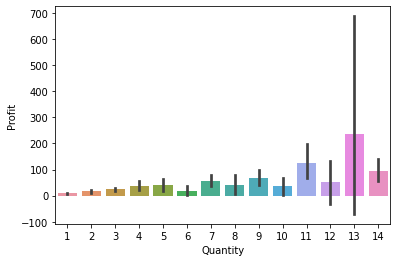

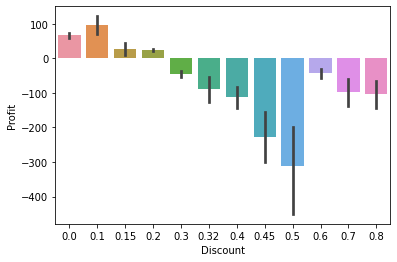

In [ ]:
for col in discreate_feature:
  sns.barplot(x=col,y="Profit",data=df)
  plt.show()

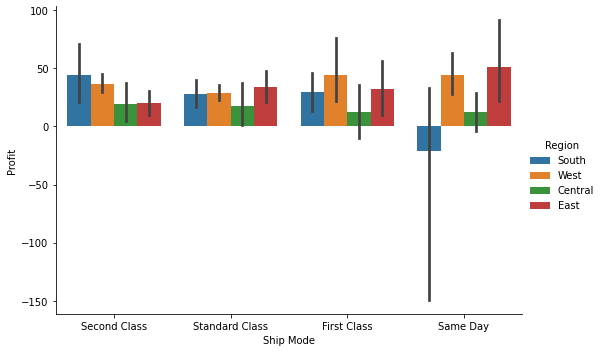

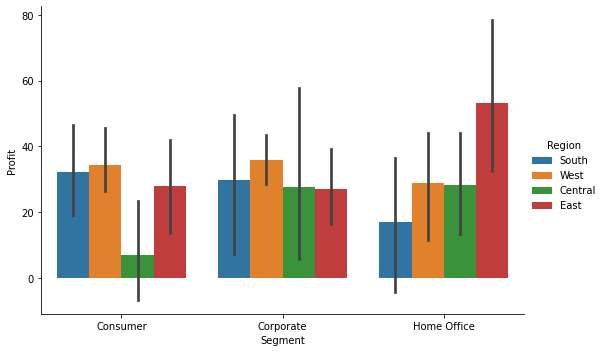

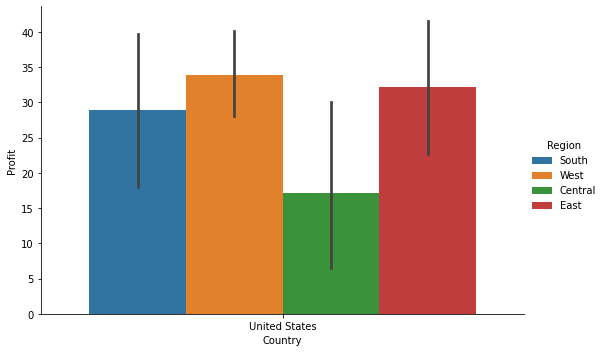

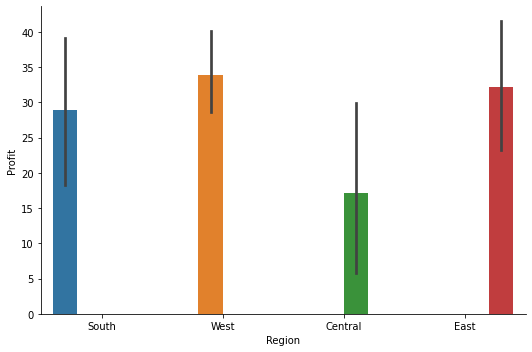

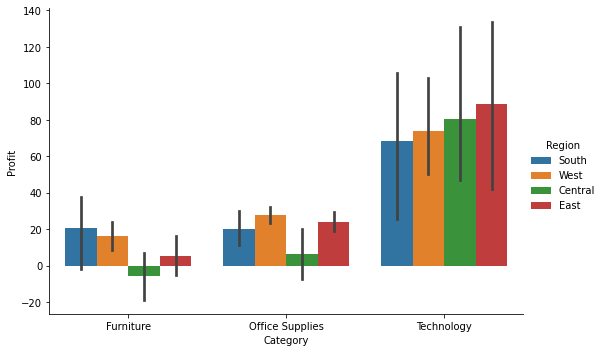

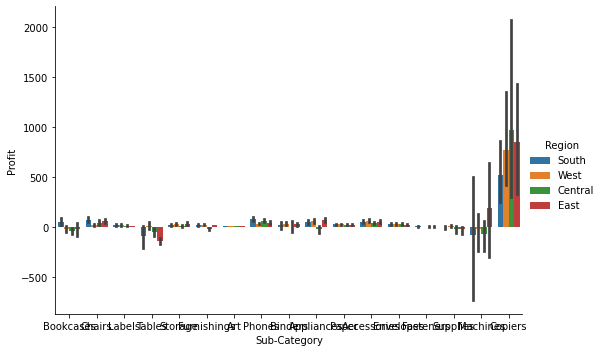

In [ ]:
for col in cat_discreate_feature:
  sns.catplot(x=col,y="Profit",hue="Region",data=df,height=5,kind="bar",aspect=1.5)
  plt.xlabel(col)
  plt.ylabel("Profit")
  plt.show()

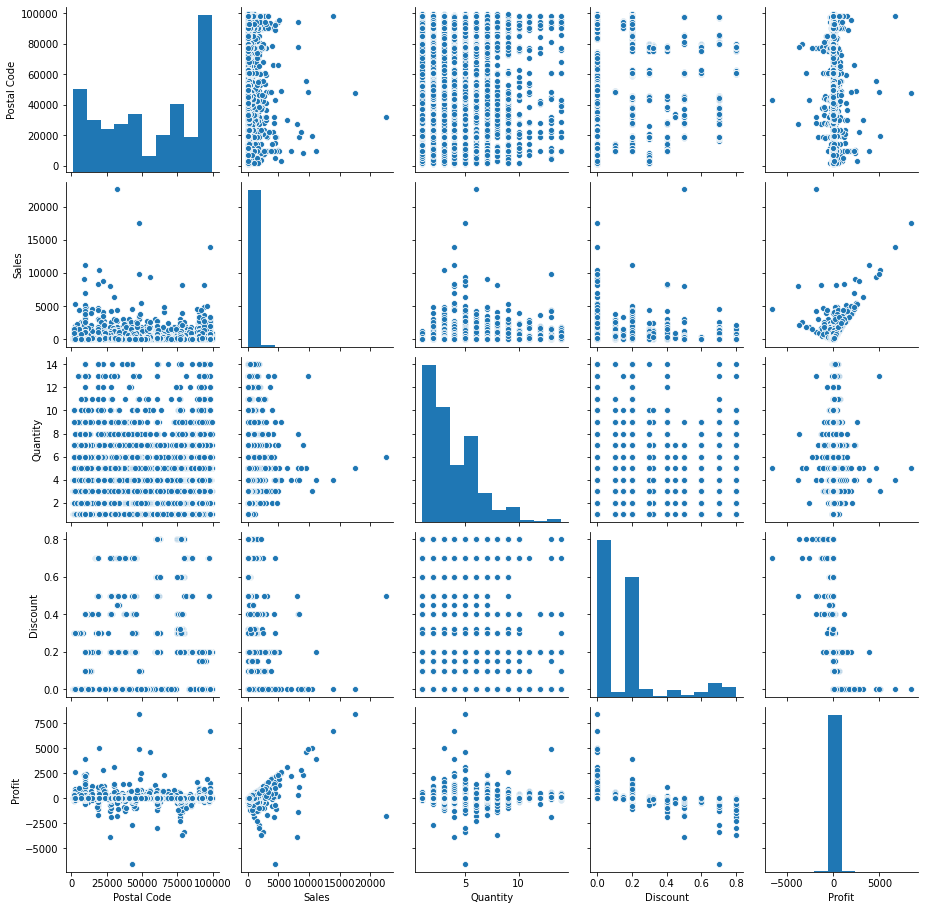

In [ ]:
sns.pairplot(df)

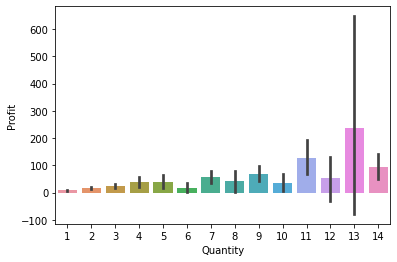

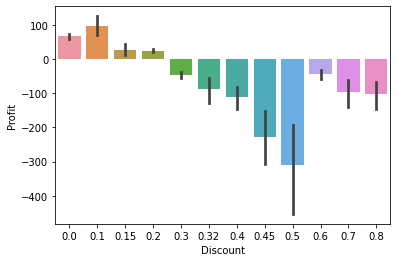

In [ ]:
for col in discreate_feature:
  sns.barplot(x=col,y="Profit",data=df)
  plt.xlabel(col)
  plt.ylabel("Profit")
  plt.show()

As we can see that the profit is decreasing as we increase the discount.

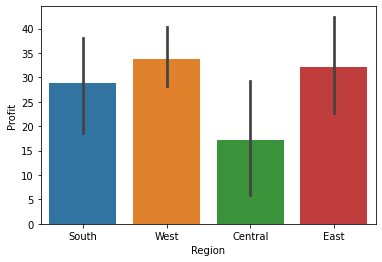

In [ ]:
sns.barplot(x="Region",y="Profit",data=df)

As we can see that in Eastern region the Same day Shipping Mode is mostly used whereas in South Second Class in mostly used. So we can say that we have to use different ship mode in different region. We cannot use an one standard ship mode for All region.

In [ ]:
seg_quantity=df.groupby("Segment")["Quantity"].mean().reset_index()

Text(0.5, 1.0, 'Quantity ordered by each segmeant')

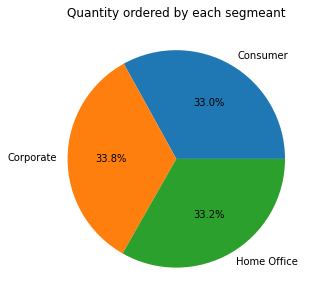

In [ ]:
label=df["Segment"].unique()
plt.figure(figsize=(5,5))
plt.pie(seg_quantity["Quantity"],labels=label,autopct='%1.1f%%')
plt.title("Quantity ordered by each segmeant")

In [ ]:
df["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

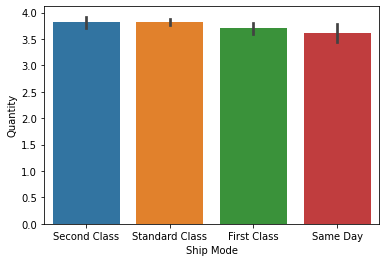

In [ ]:
sns.barplot(x="Ship Mode",y="Quantity",data=df)

As we can see the Second Class ship mode was used to transport the highest quantity

Text(0.5, 1.0, 'Sales in each Category')

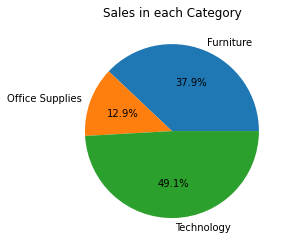

In [ ]:
Sale_category=df.groupby("Category")["Sales"].mean().reset_index()
label=df["Category"].unique()
plt.pie(Sale_category["Sales"],labels=label,autopct="%1.1f%%")
plt.title("Sales in each Category")

Technology has the highest sales while office Supplies has the lowest sales.

Text(0.5, 1.0, 'Highest Discount in Sub-Category')

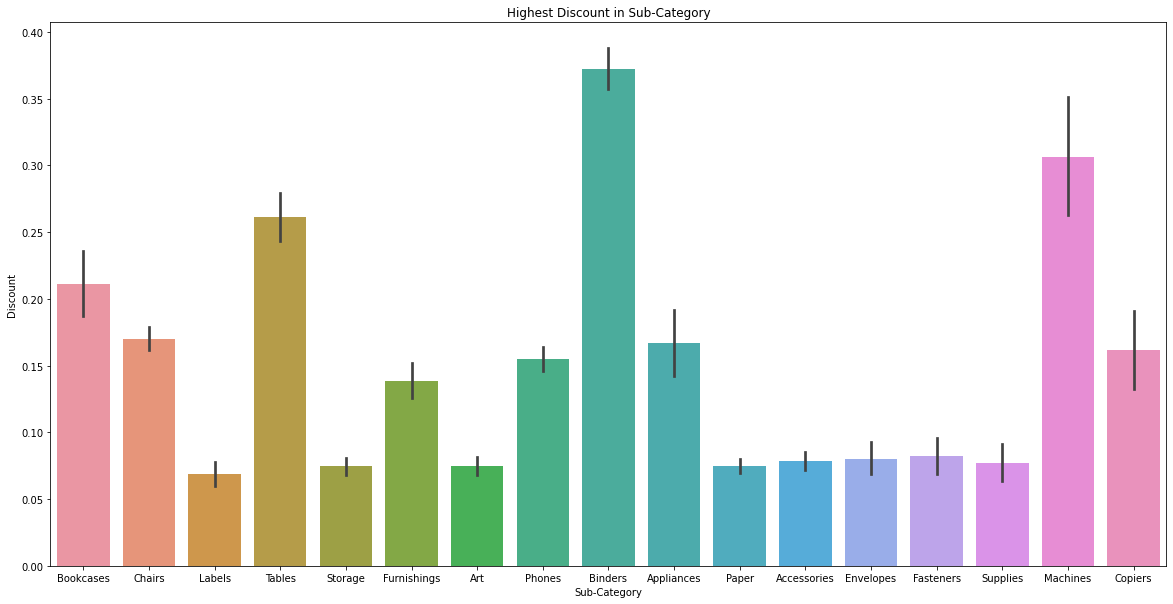

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x="Sub-Category",y="Discount",data=df)
plt.title("Highest Discount in Sub-Category")

In [ ]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


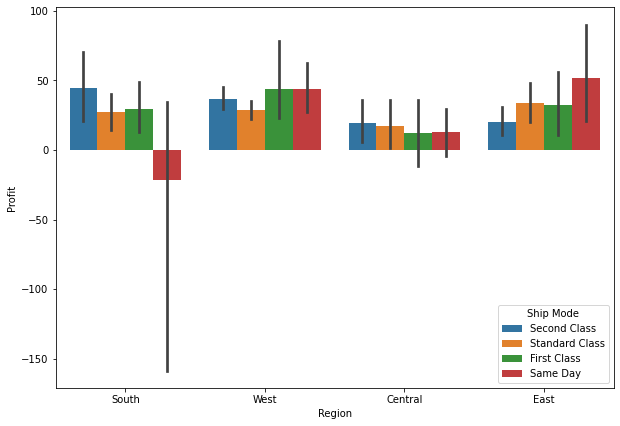

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x="Region",y="Profit",hue="Ship Mode",data=df)

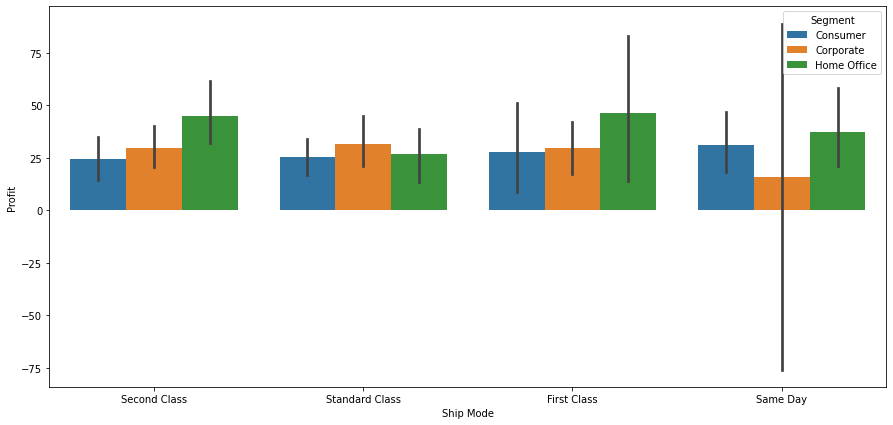

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x="Ship Mode",y="Profit",hue="Segment",data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

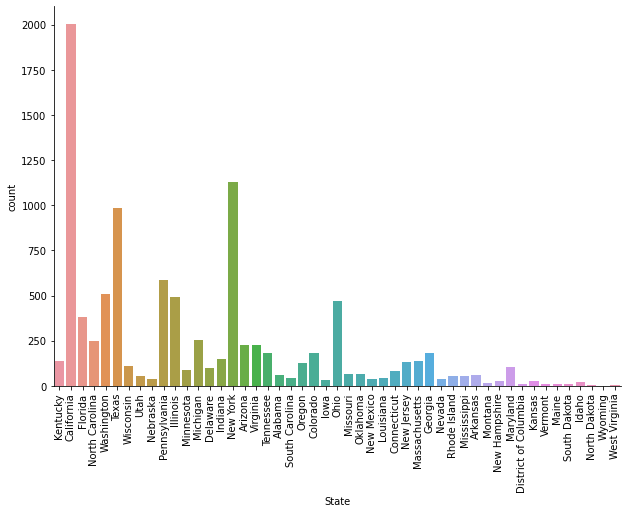

In [ ]:
#plt.figure(figsize=(20,5))
sns.catplot("State",kind="count",data=df,height=6,aspect=1.5)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Region with highest quantity')

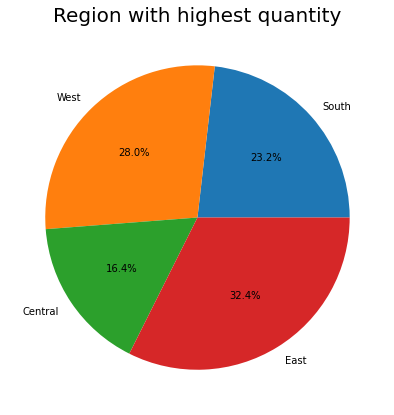

In [ ]:
region_quantity=df.groupby("Region")["Quantity"].sum().reset_index()
label=df["Region"].unique()
plt.figure(figsize=(7,7))
plt.pie(region_quantity["Quantity"],labels=label,autopct='%1.1f%%')
plt.title("Region with highest quantity",size=20)

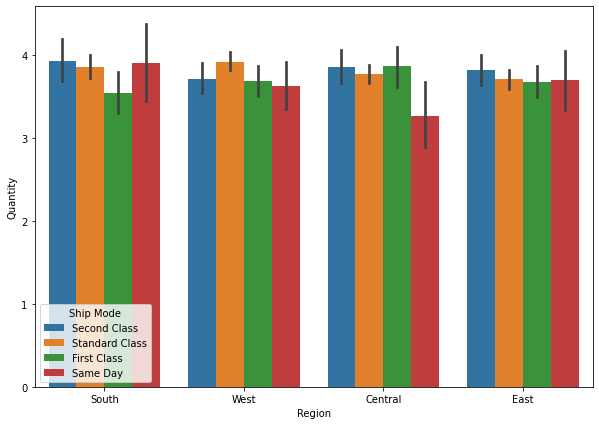

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x="Region",y="Quantity",hue="Ship Mode",data=df)

# **Category with respect to Quantity**

In [ ]:
cat_quantity=df.groupby("Category")["Quantity"].mean().reset_index()
cat_quantity

,Category,Quantity
0,Furniture,3.785007
1,Office Supplies,3.801195
2,Technology,3.756903


# **Top 10 Profit Cities**

<Figure size 720x504 with 0 Axes>

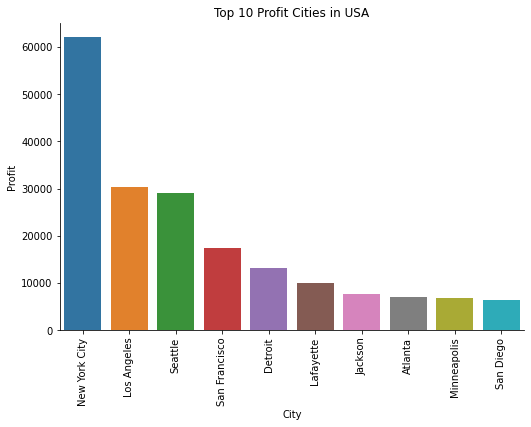

<Figure size 720x504 with 0 Axes>

In [ ]:
city_profit=df.groupby("City")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
top10_profit_city=city_profit.head(10)
sns.catplot(x="City",y="Profit",data=top10_profit_city,height=5,aspect=1.5,kind="bar")
plt.xticks(rotation=90,size=10)
plt.title("Top 10 Profit Cities in USA")
plt.figure(figsize=(10,7))

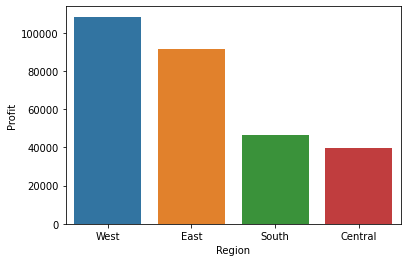

In [ ]:
region_profit=df.groupby("Region")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
sns.barplot(x="Region",y="Profit",data=region_profit)

West is the highest profit region

<Figure size 720x504 with 0 Axes>

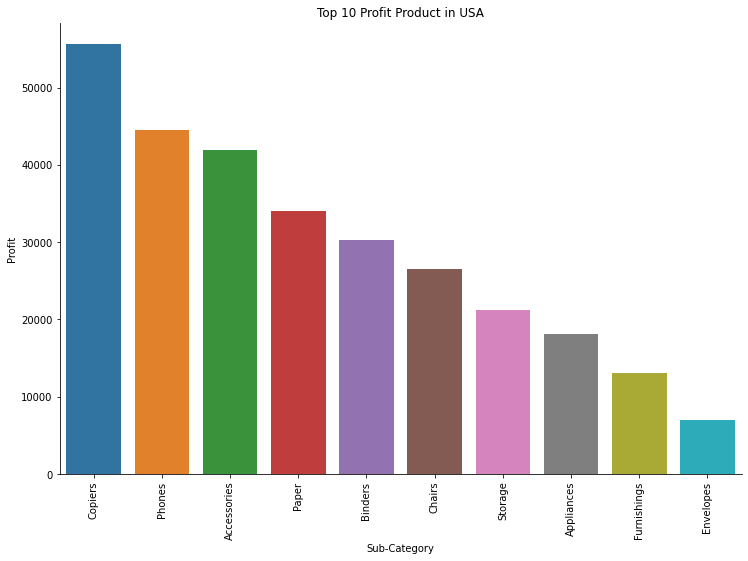

<Figure size 720x504 with 0 Axes>

In [ ]:
sub_category_profit=df.groupby("Sub-Category")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
top10_sub_category_profit_city=sub_category_profit.head(10)
sns.catplot(x="Sub-Category",y="Profit",data=top10_sub_category_profit_city,kind="bar",height=7,aspect=1.5)
plt.xticks(rotation=90,size=10)
plt.title("Top 10 Profit Product in USA")
plt.figure(figsize=(10,7))

In [ ]:
df[categorical_feature].nunique()

Ship Mode         4
Segment           3
Country           1
City            531
State            49
Region            4
Category          3
Sub-Category     17
dtype: int64

In [ ]:
cat_discreate_feature=[col for col in categorical_feature if (len(df[col].unique())<18)]
print(cat_discreate_feature)

['Ship Mode', 'Segment', 'Country', 'Region', 'Category', 'Sub-Category']


In [ ]:
cat_continues_feature=[col for col in categorical_feature  if col not in cat_discreate_feature]
print(cat_continues_feature)

['City', 'State']


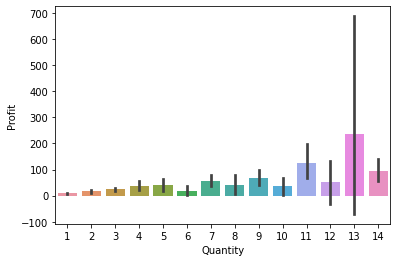

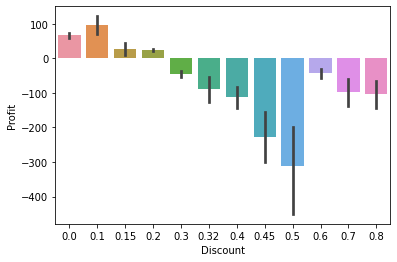

In [ ]:
for col in discreate_feature:
  sns.barplot(x=col,y="Profit",data=df)
  plt.show()

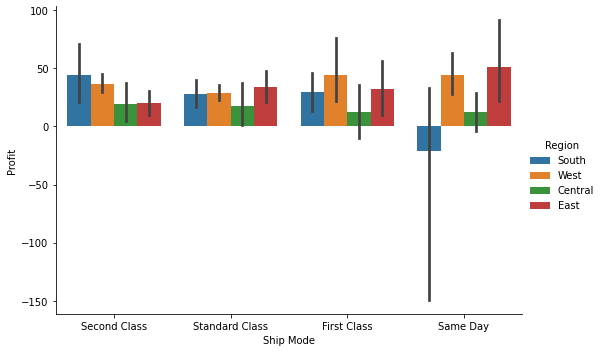

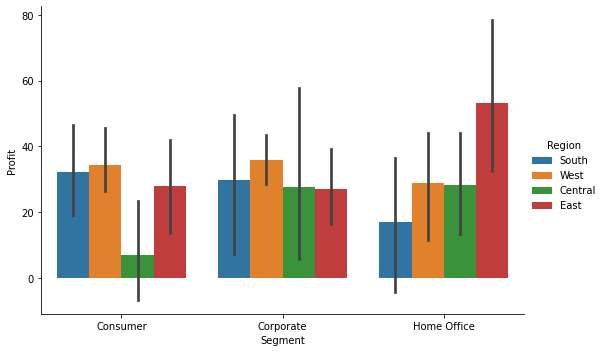

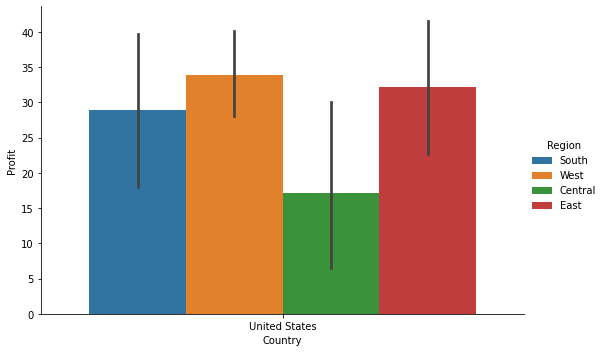

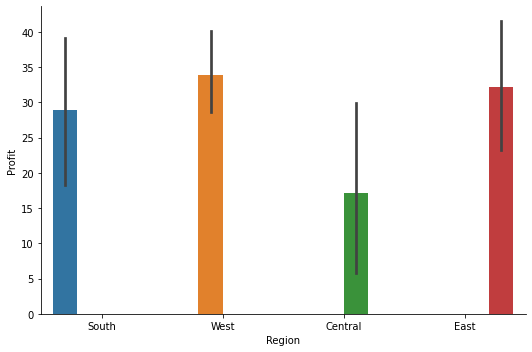

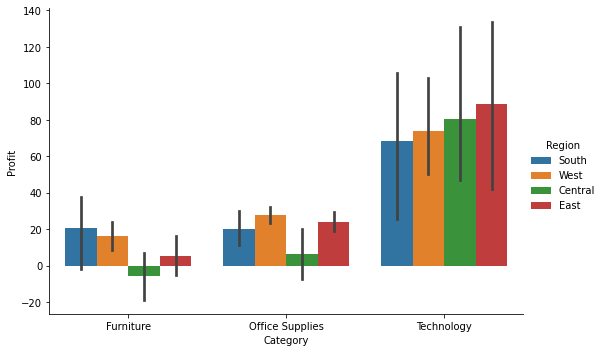

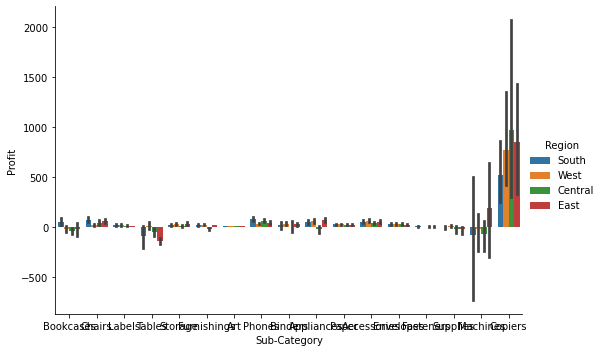

In [ ]:
for col in cat_discreate_feature:
  sns.catplot(x=col,y="Profit",hue="Region",data=df,height=5,kind="bar",aspect=1.5)
  plt.xlabel(col)
  plt.ylabel("Profit")
  plt.show()

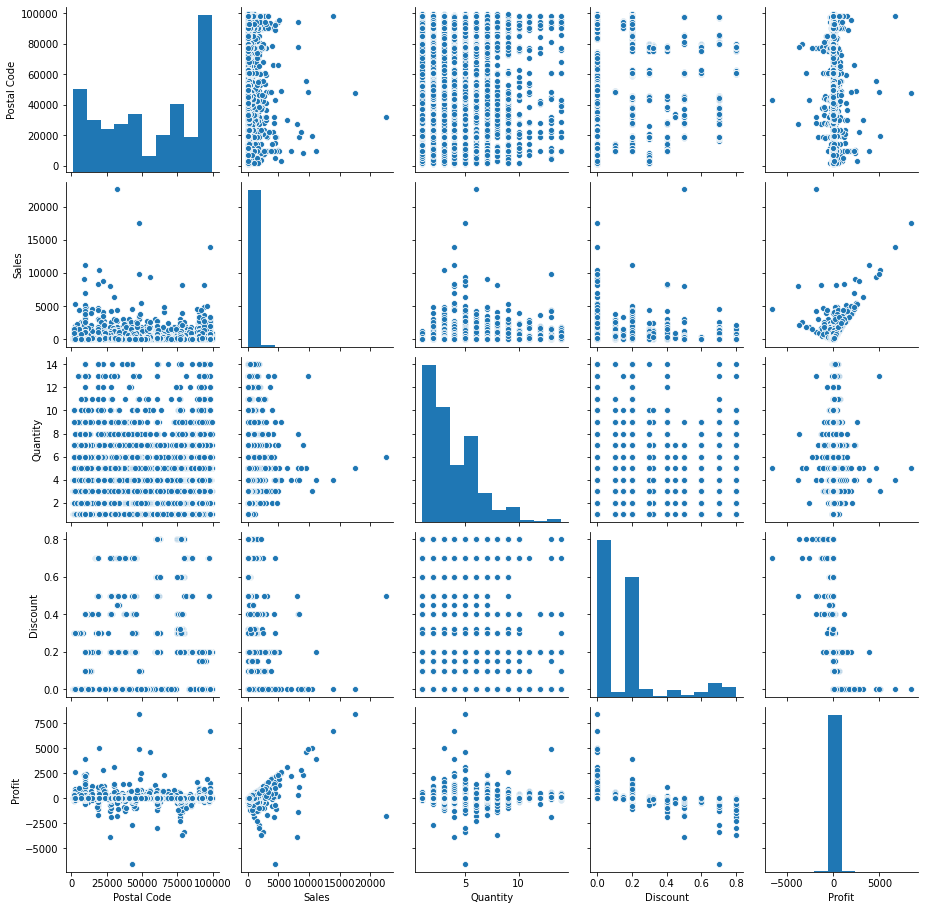

In [ ]:
sns.pairplot(df)

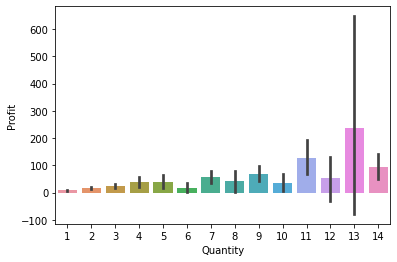

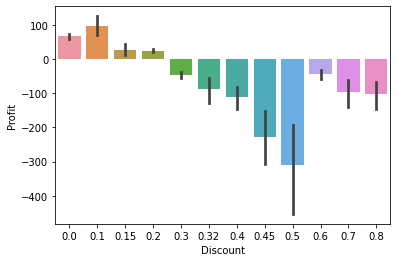

In [ ]:
for col in discreate_feature:
  sns.barplot(x=col,y="Profit",data=df)
  plt.xlabel(col)
  plt.ylabel("Profit")
  plt.show()

As we can see that the profit is decreasing as we increase the discount.

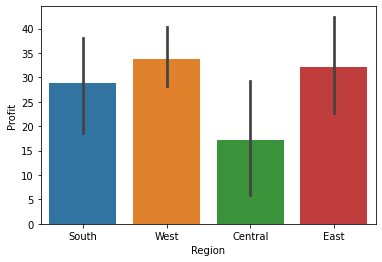

In [ ]:
sns.barplot(x="Region",y="Profit",data=df)

As we can see that in Eastern region the Same day Shipping Mode is mostly used whereas in South Second Class in mostly used. So we can say that we have to use different ship mode in different region. We cannot use an one standard ship mode for All region.

In [ ]:
seg_quantity=df.groupby("Segment")["Quantity"].mean().reset_index()

Text(0.5, 1.0, 'Quantity ordered by each segmeant')

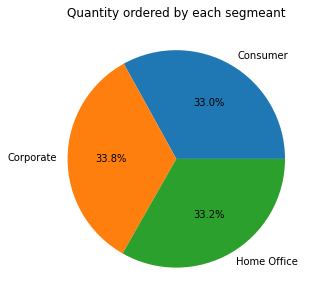

In [ ]:
label=df["Segment"].unique()
plt.figure(figsize=(5,5))
plt.pie(seg_quantity["Quantity"],labels=label,autopct='%1.1f%%')
plt.title("Quantity ordered by each segmeant")

In [ ]:
df["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

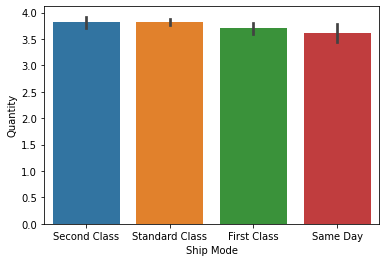

In [ ]:
sns.barplot(x="Ship Mode",y="Quantity",data=df)

As we can see the Second Class ship mode was used to transport the highest quantity

Text(0.5, 1.0, 'Sales in each Category')

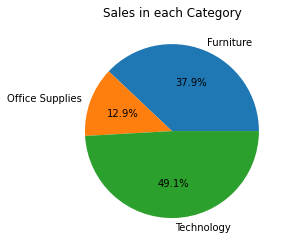

In [ ]:
Sale_category=df.groupby("Category")["Sales"].mean().reset_index()
label=df["Category"].unique()
plt.pie(Sale_category["Sales"],labels=label,autopct="%1.1f%%")
plt.title("Sales in each Category")

Technology has the highest sales while office Supplies has the lowest sales.

Text(0.5, 1.0, 'Highest Discount in Sub-Category')

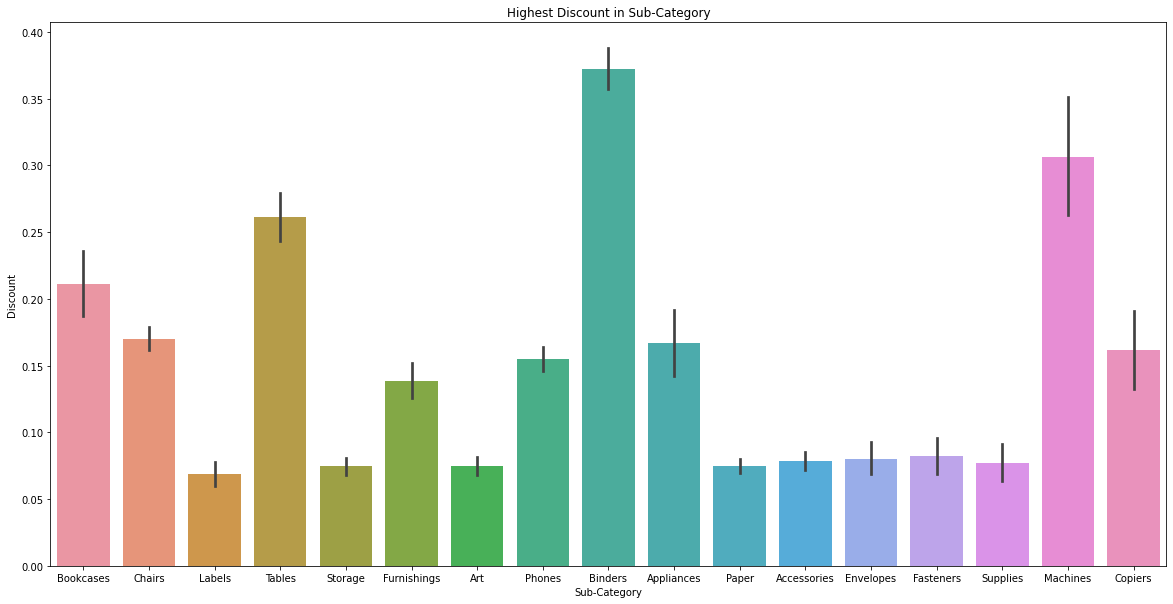

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x="Sub-Category",y="Discount",data=df)
plt.title("Highest Discount in Sub-Category")

In [ ]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


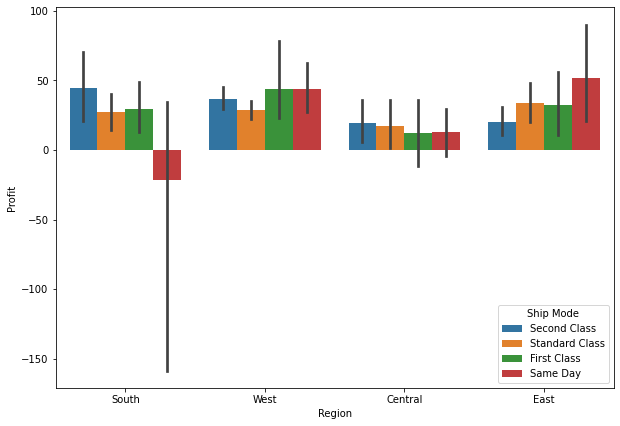

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x="Region",y="Profit",hue="Ship Mode",data=df)

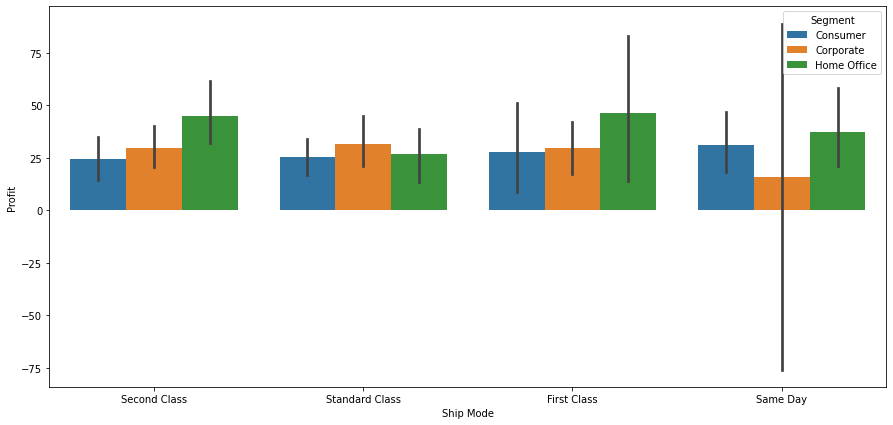

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x="Ship Mode",y="Profit",hue="Segment",data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

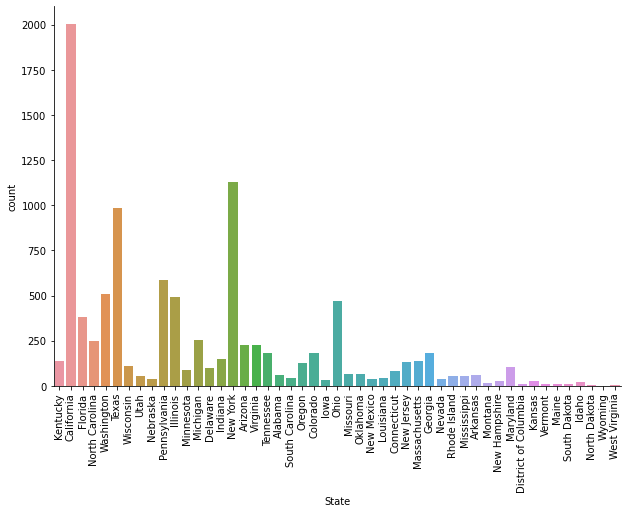

In [ ]:
#plt.figure(figsize=(20,5))
sns.catplot("State",kind="count",data=df,height=6,aspect=1.5)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Region with highest quantity')

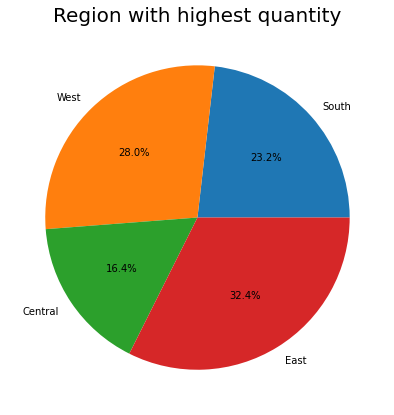

In [ ]:
region_quantity=df.groupby("Region")["Quantity"].sum().reset_index()
label=df["Region"].unique()
plt.figure(figsize=(7,7))
plt.pie(region_quantity["Quantity"],labels=label,autopct='%1.1f%%')
plt.title("Region with highest quantity",size=20)

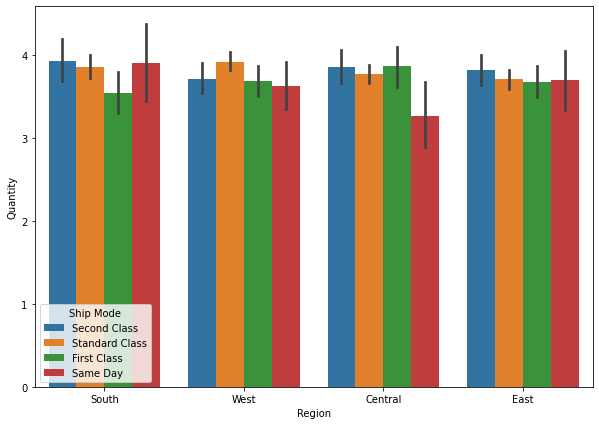

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x="Region",y="Quantity",hue="Ship Mode",data=df)

# **Category with respect to Quantity**

In [ ]:
cat_quantity=df.groupby("Category")["Quantity"].mean().reset_index()
cat_quantity

,Category,Quantity
0,Furniture,3.785007
1,Office Supplies,3.801195
2,Technology,3.756903


# **Top 10 Profit Cities**

<Figure size 720x504 with 0 Axes>

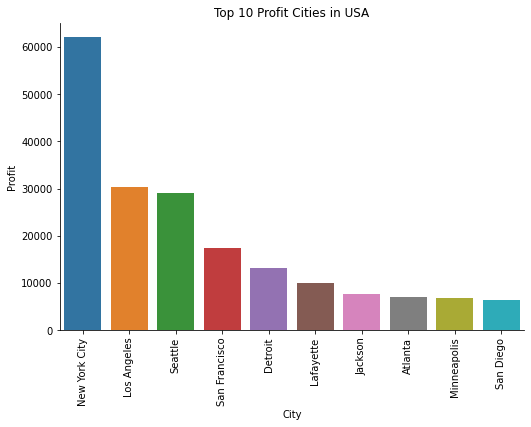

<Figure size 720x504 with 0 Axes>

In [ ]:
city_profit=df.groupby("City")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
top10_profit_city=city_profit.head(10)
sns.catplot(x="City",y="Profit",data=top10_profit_city,height=5,aspect=1.5,kind="bar")
plt.xticks(rotation=90,size=10)
plt.title("Top 10 Profit Cities in USA")
plt.figure(figsize=(10,7))

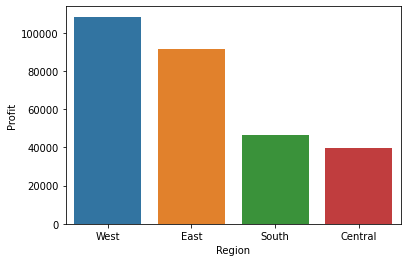

In [ ]:
region_profit=df.groupby("Region")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
sns.barplot(x="Region",y="Profit",data=region_profit)

West is the highest profit region

<Figure size 720x504 with 0 Axes>

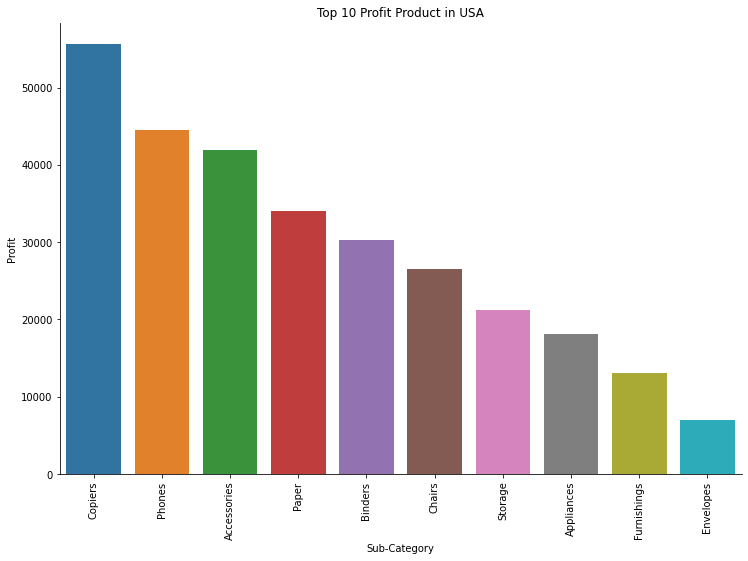

<Figure size 720x504 with 0 Axes>

In [ ]:
sub_category_profit=df.groupby("Sub-Category")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
top10_sub_category_profit_city=sub_category_profit.head(10)
sns.catplot(x="Sub-Category",y="Profit",data=top10_sub_category_profit_city,kind="bar",height=7,aspect=1.5)
plt.xticks(rotation=90,size=10)
plt.title("Top 10 Profit Product in USA")
plt.figure(figsize=(10,7))

In [ ]:
df[categorical_feature].nunique()

Ship Mode         4
Segment           3
Country           1
City            531
State            49
Region            4
Category          3
Sub-Category     17
dtype: int64

In [ ]:
cat_discreate_feature=[col for col in categorical_feature if (len(df[col].unique())<18)]
print(cat_discreate_feature)

['Ship Mode', 'Segment', 'Country', 'Region', 'Category', 'Sub-Category']


In [ ]:
cat_continues_feature=[col for col in categorical_feature  if col not in cat_discreate_feature]
print(cat_continues_feature)

['City', 'State']


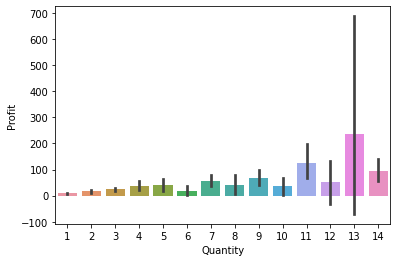

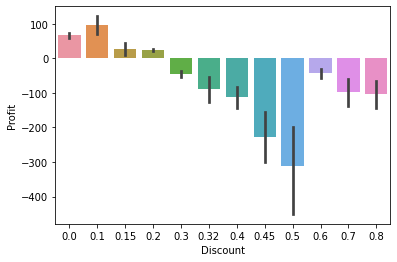

In [ ]:
for col in discreate_feature:
  sns.barplot(x=col,y="Profit",data=df)
  plt.show()

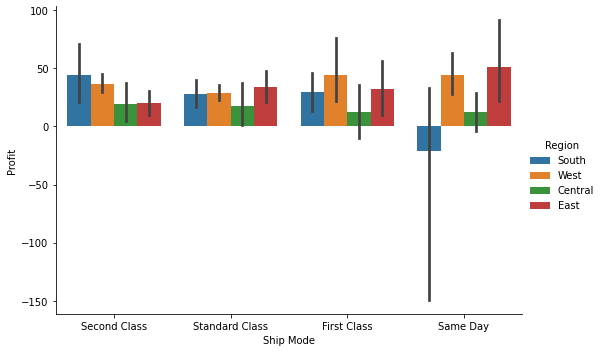

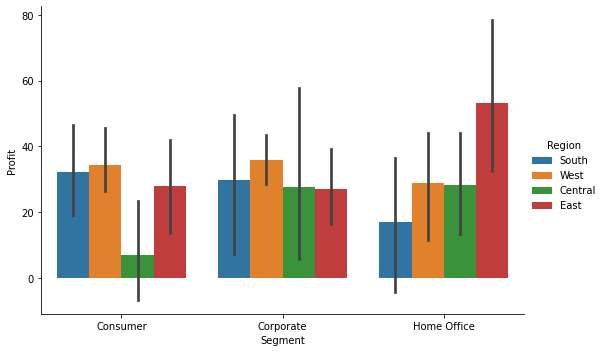

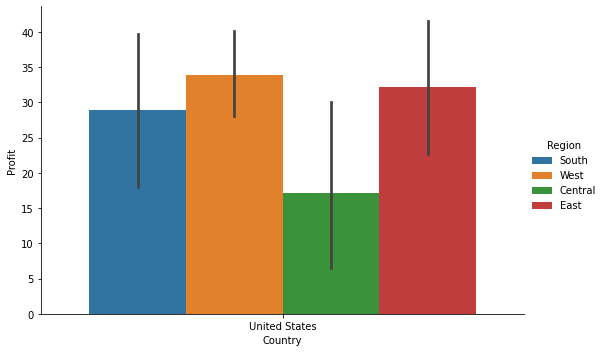

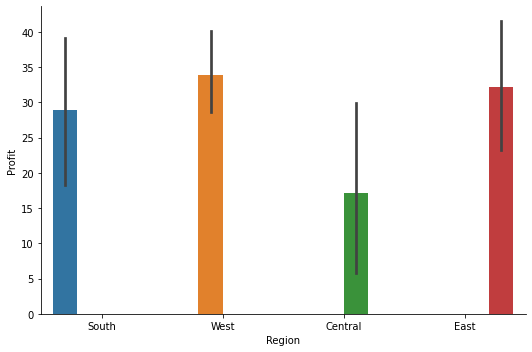

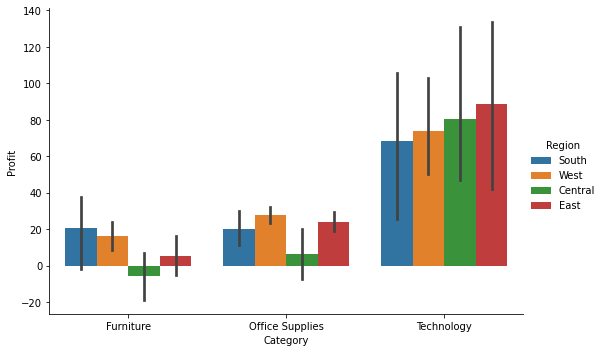

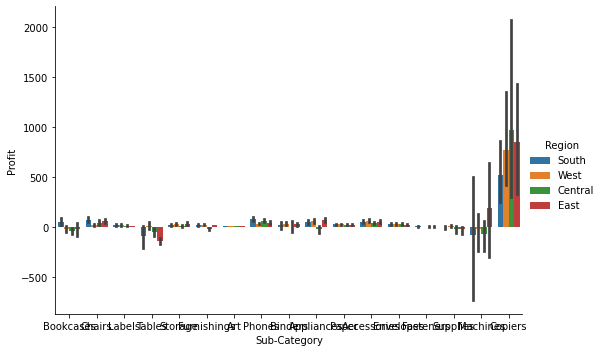

In [ ]:
for col in cat_discreate_feature:
  sns.catplot(x=col,y="Profit",hue="Region",data=df,height=5,kind="bar",aspect=1.5)
  plt.xlabel(col)
  plt.ylabel("Profit")
  plt.show()

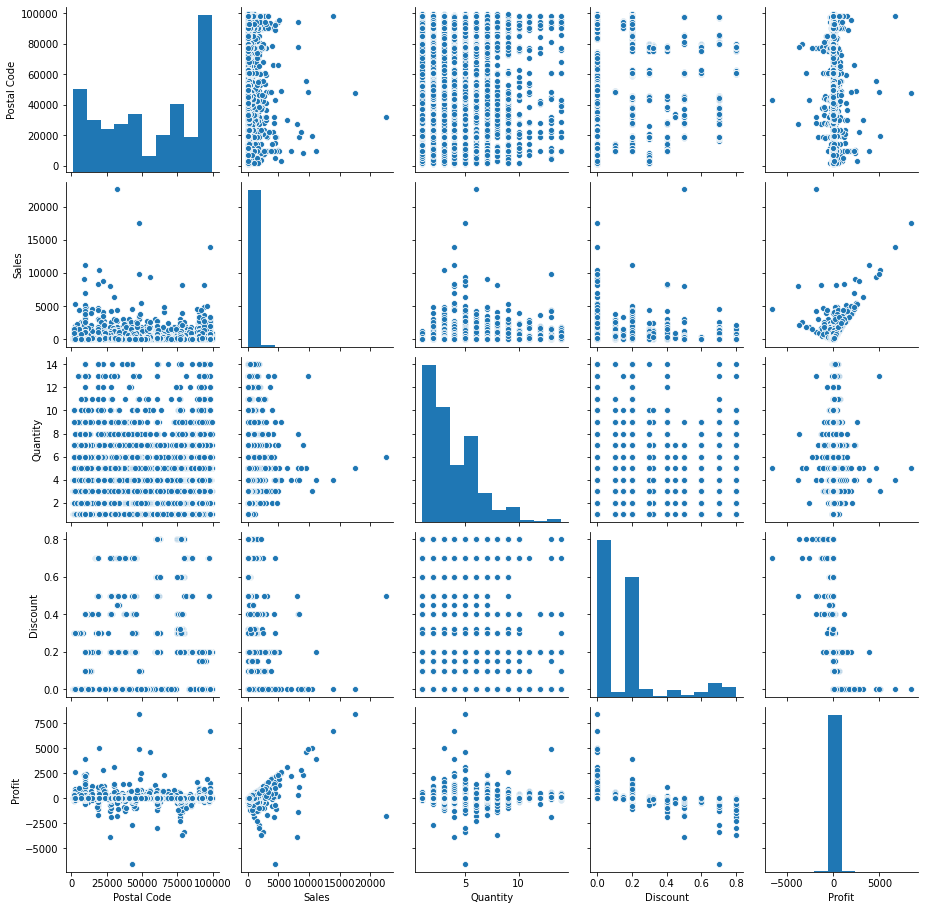

In [ ]:
sns.pairplot(df)

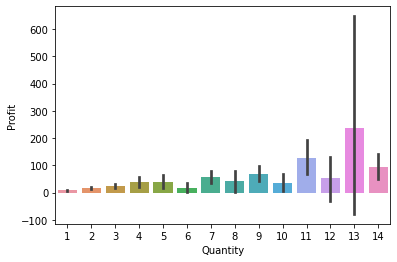

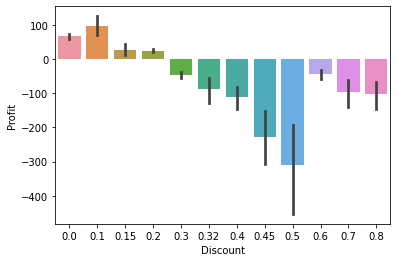

In [ ]:
for col in discreate_feature:
  sns.barplot(x=col,y="Profit",data=df)
  plt.xlabel(col)
  plt.ylabel("Profit")
  plt.show()

As we can see that the profit is decreasing as we increase the discount.

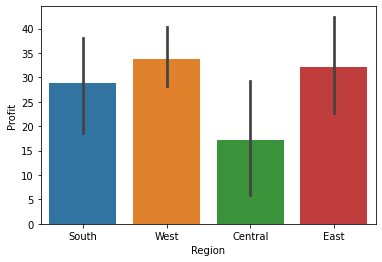

In [ ]:
sns.barplot(x="Region",y="Profit",data=df)

As we can see that in Eastern region the Same day Shipping Mode is mostly used whereas in South Second Class in mostly used. So we can say that we have to use different ship mode in different region. We cannot use an one standard ship mode for All region.

In [ ]:
seg_quantity=df.groupby("Segment")["Quantity"].mean().reset_index()

Text(0.5, 1.0, 'Quantity ordered by each segmeant')

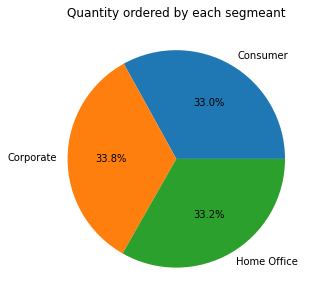

In [ ]:
label=df["Segment"].unique()
plt.figure(figsize=(5,5))
plt.pie(seg_quantity["Quantity"],labels=label,autopct='%1.1f%%')
plt.title("Quantity ordered by each segmeant")

In [ ]:
df["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

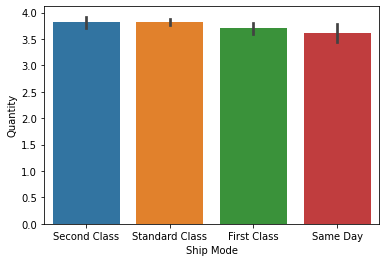

In [ ]:
sns.barplot(x="Ship Mode",y="Quantity",data=df)

As we can see the Second Class ship mode was used to transport the highest quantity

Text(0.5, 1.0, 'Sales in each Category')

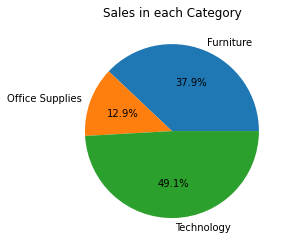

In [ ]:
Sale_category=df.groupby("Category")["Sales"].mean().reset_index()
label=df["Category"].unique()
plt.pie(Sale_category["Sales"],labels=label,autopct="%1.1f%%")
plt.title("Sales in each Category")

Technology has the highest sales while office Supplies has the lowest sales.

Text(0.5, 1.0, 'Highest Discount in Sub-Category')

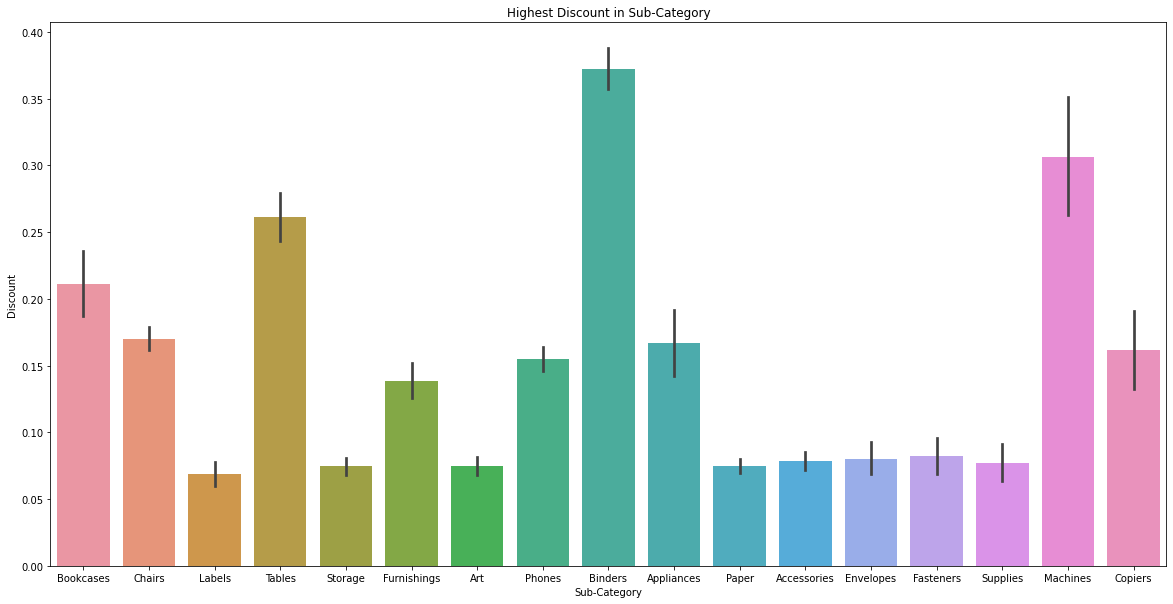

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x="Sub-Category",y="Discount",data=df)
plt.title("Highest Discount in Sub-Category")

In [ ]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


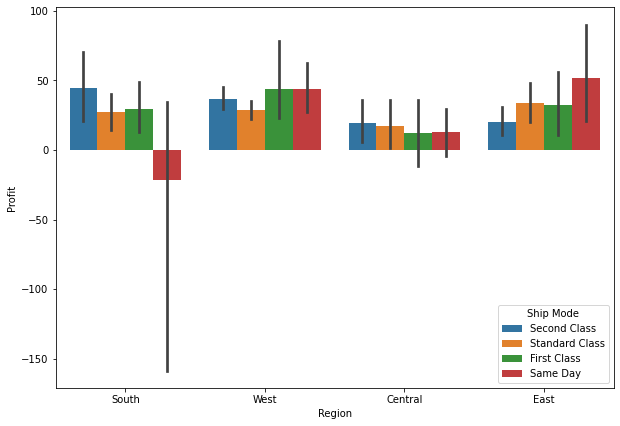

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x="Region",y="Profit",hue="Ship Mode",data=df)

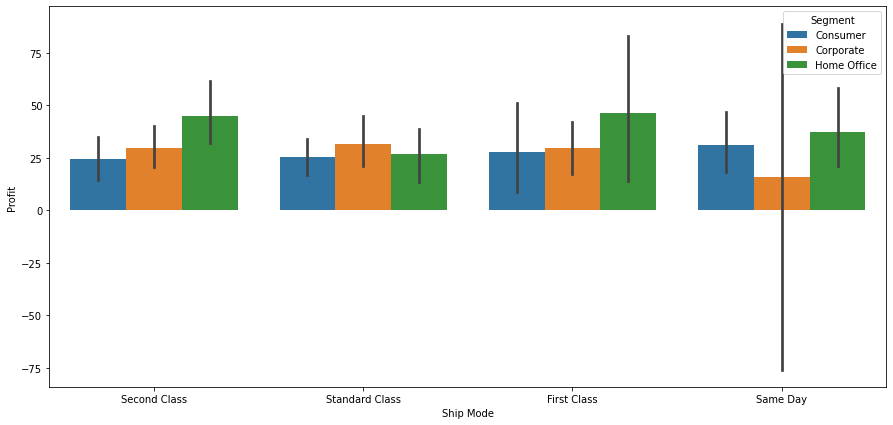

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x="Ship Mode",y="Profit",hue="Segment",data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

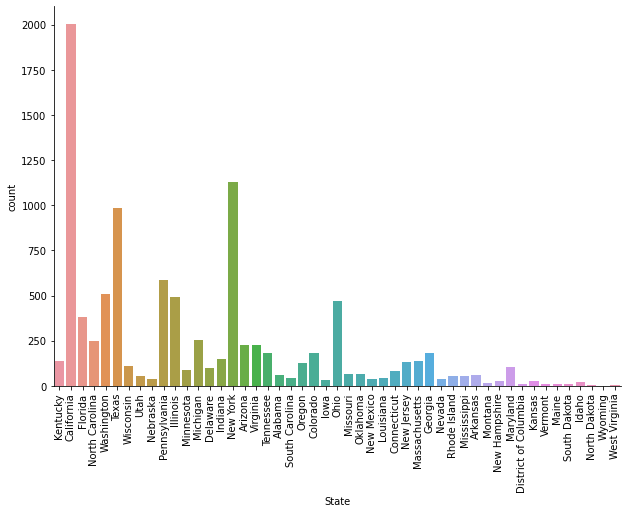

In [ ]:
#plt.figure(figsize=(20,5))
sns.catplot("State",kind="count",data=df,height=6,aspect=1.5)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Region with highest quantity')

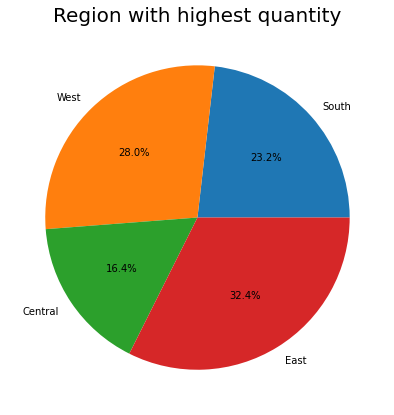

In [ ]:
region_quantity=df.groupby("Region")["Quantity"].sum().reset_index()
label=df["Region"].unique()
plt.figure(figsize=(7,7))
plt.pie(region_quantity["Quantity"],labels=label,autopct='%1.1f%%')
plt.title("Region with highest quantity",size=20)

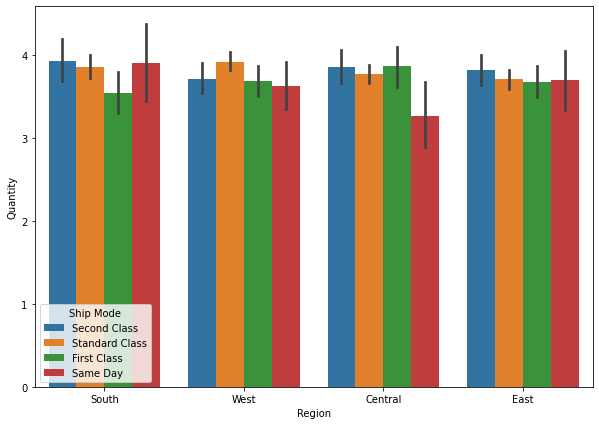

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x="Region",y="Quantity",hue="Ship Mode",data=df)

# **Category with respect to Quantity**

In [ ]:
cat_quantity=df.groupby("Category")["Quantity"].mean().reset_index()
cat_quantity

,Category,Quantity
0,Furniture,3.785007
1,Office Supplies,3.801195
2,Technology,3.756903


# **Top 10 Profit Cities**

<Figure size 720x504 with 0 Axes>

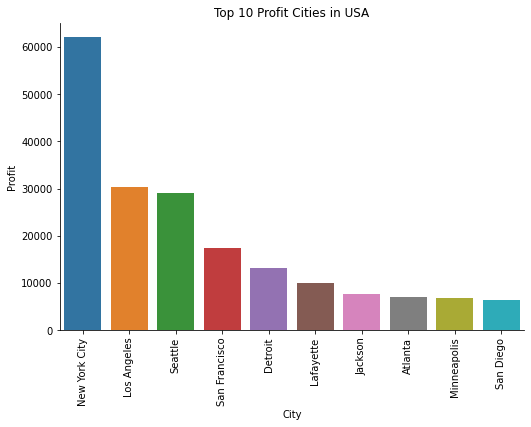

<Figure size 720x504 with 0 Axes>

In [ ]:
city_profit=df.groupby("City")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
top10_profit_city=city_profit.head(10)
sns.catplot(x="City",y="Profit",data=top10_profit_city,height=5,aspect=1.5,kind="bar")
plt.xticks(rotation=90,size=10)
plt.title("Top 10 Profit Cities in USA")
plt.figure(figsize=(10,7))

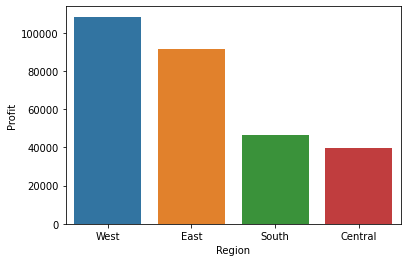

In [ ]:
region_profit=df.groupby("Region")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
sns.barplot(x="Region",y="Profit",data=region_profit)

West is the highest profit region

<Figure size 720x504 with 0 Axes>

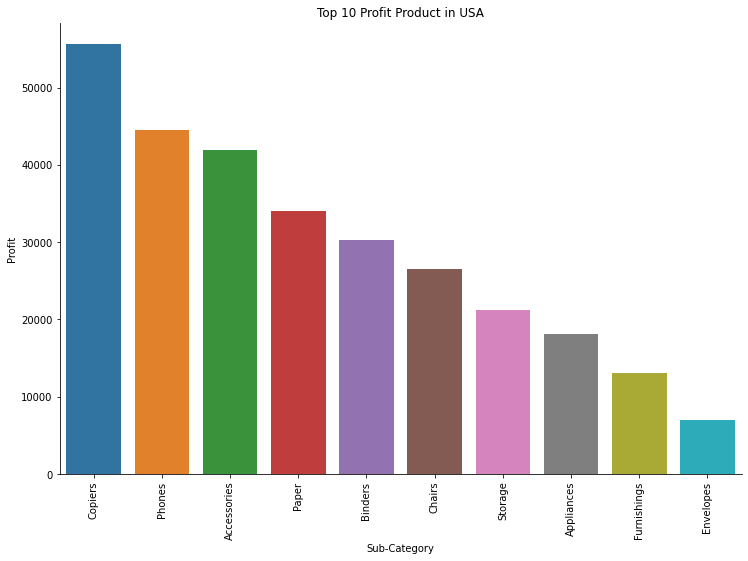

<Figure size 720x504 with 0 Axes>

In [ ]:
sub_category_profit=df.groupby("Sub-Category")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
top10_sub_category_profit_city=sub_category_profit.head(10)
sns.catplot(x="Sub-Category",y="Profit",data=top10_sub_category_profit_city,kind="bar",height=7,aspect=1.5)
plt.xticks(rotation=90,size=10)
plt.title("Top 10 Profit Product in USA")
plt.figure(figsize=(10,7))

In [ ]:
df[categorical_feature].nunique()

Ship Mode         4
Segment           3
Country           1
City            531
State            49
Region            4
Category          3
Sub-Category     17
dtype: int64

In [ ]:
cat_discreate_feature=[col for col in categorical_feature if (len(df[col].unique())<18)]
print(cat_discreate_feature)

['Ship Mode', 'Segment', 'Country', 'Region', 'Category', 'Sub-Category']


In [ ]:
cat_continues_feature=[col for col in categorical_feature  if col not in cat_discreate_feature]
print(cat_continues_feature)

['City', 'State']


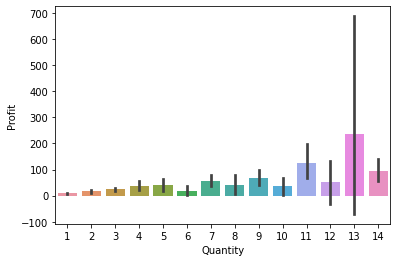

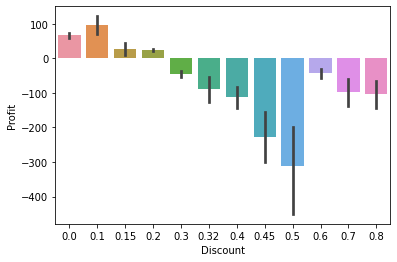

In [ ]:
for col in discreate_feature:
  sns.barplot(x=col,y="Profit",data=df)
  plt.show()

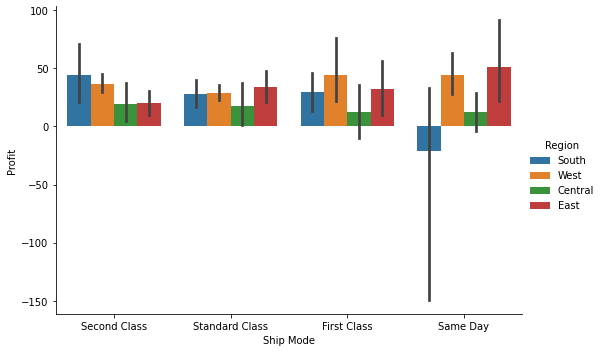

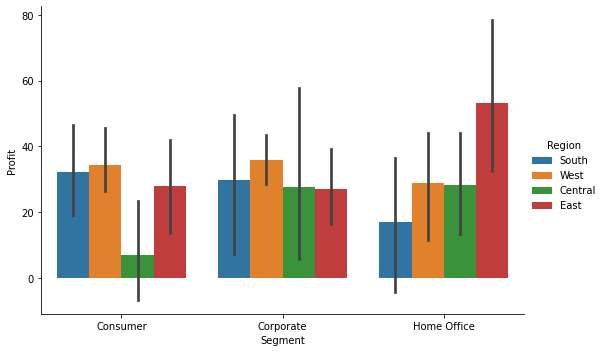

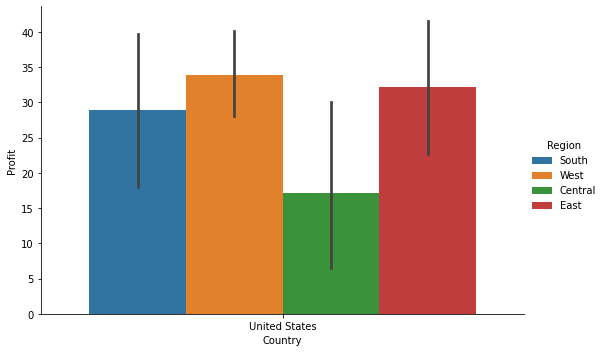

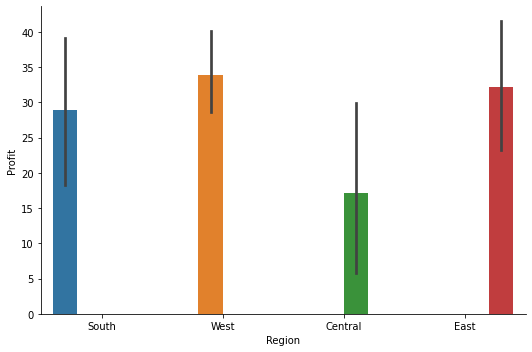

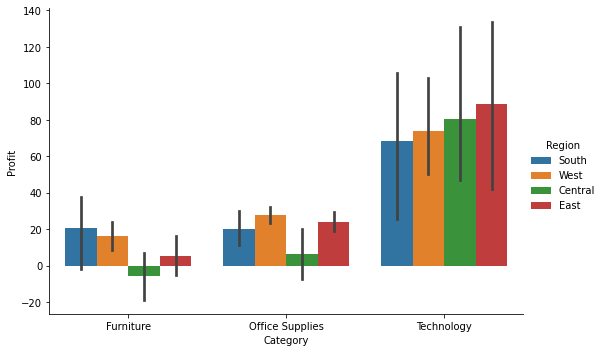

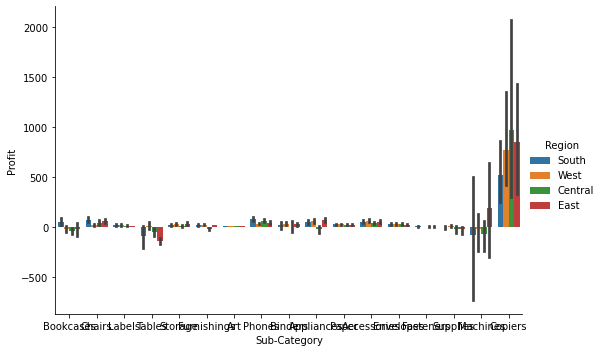

In [ ]:
for col in cat_discreate_feature:
  sns.catplot(x=col,y="Profit",hue="Region",data=df,height=5,kind="bar",aspect=1.5)
  plt.xlabel(col)
  plt.ylabel("Profit")
  plt.show()

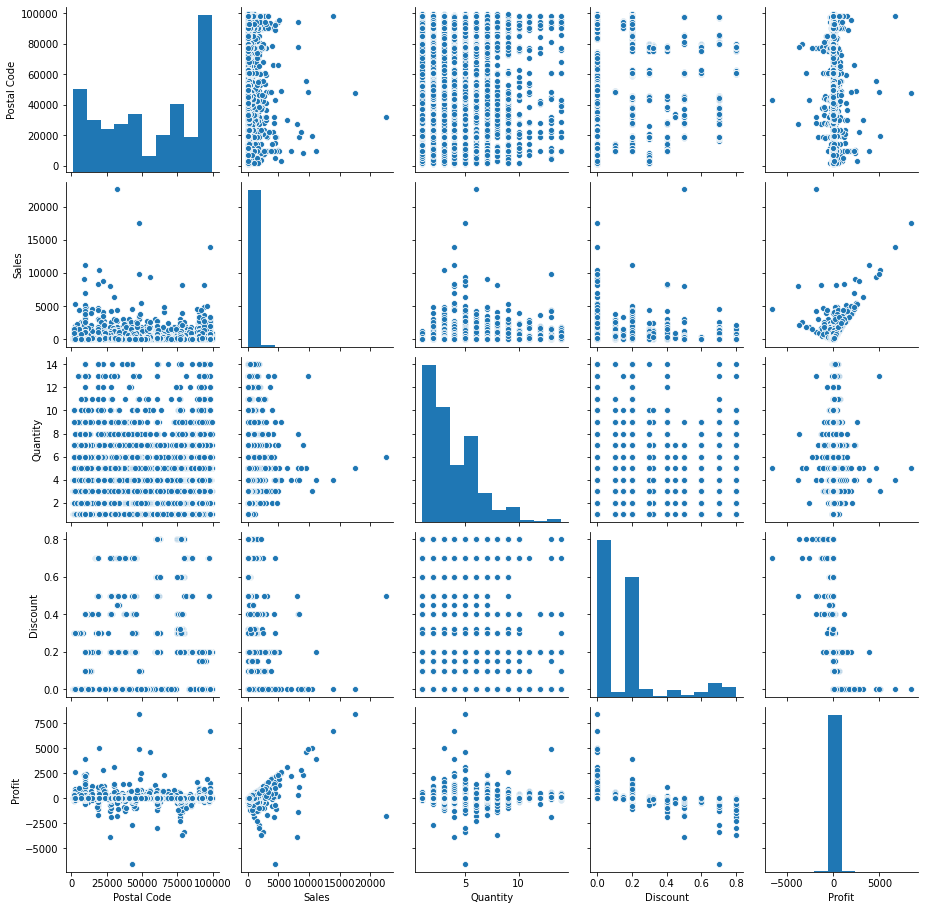

In [ ]:
sns.pairplot(df)

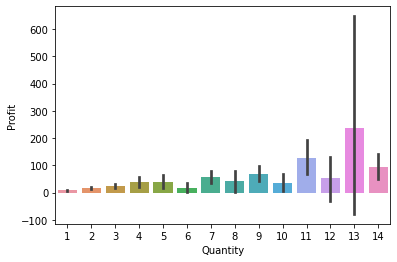

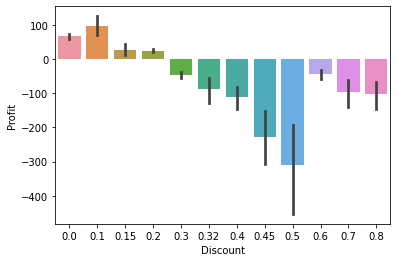

In [ ]:
for col in discreate_feature:
  sns.barplot(x=col,y="Profit",data=df)
  plt.xlabel(col)
  plt.ylabel("Profit")
  plt.show()

As we can see that the profit is decreasing as we increase the discount.

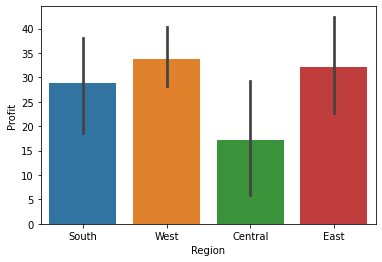

In [ ]:
sns.barplot(x="Region",y="Profit",data=df)

As we can see that in Eastern region the Same day Shipping Mode is mostly used whereas in South Second Class in mostly used. So we can say that we have to use different ship mode in different region. We cannot use an one standard ship mode for All region.

In [ ]:
seg_quantity=df.groupby("Segment")["Quantity"].mean().reset_index()

Text(0.5, 1.0, 'Quantity ordered by each segmeant')

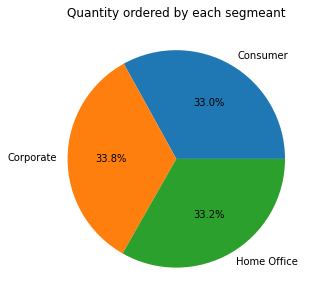

In [ ]:
label=df["Segment"].unique()
plt.figure(figsize=(5,5))
plt.pie(seg_quantity["Quantity"],labels=label,autopct='%1.1f%%')
plt.title("Quantity ordered by each segmeant")

In [ ]:
df["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

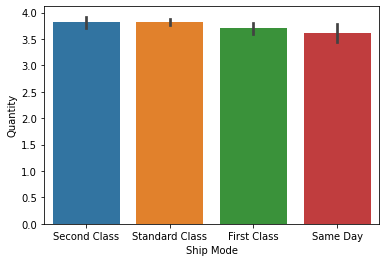

In [ ]:
sns.barplot(x="Ship Mode",y="Quantity",data=df)

As we can see the Second Class ship mode was used to transport the highest quantity

Text(0.5, 1.0, 'Sales in each Category')

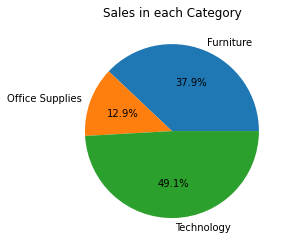

In [ ]:
Sale_category=df.groupby("Category")["Sales"].mean().reset_index()
label=df["Category"].unique()
plt.pie(Sale_category["Sales"],labels=label,autopct="%1.1f%%")
plt.title("Sales in each Category")

Technology has the highest sales while office Supplies has the lowest sales.

Text(0.5, 1.0, 'Highest Discount in Sub-Category')

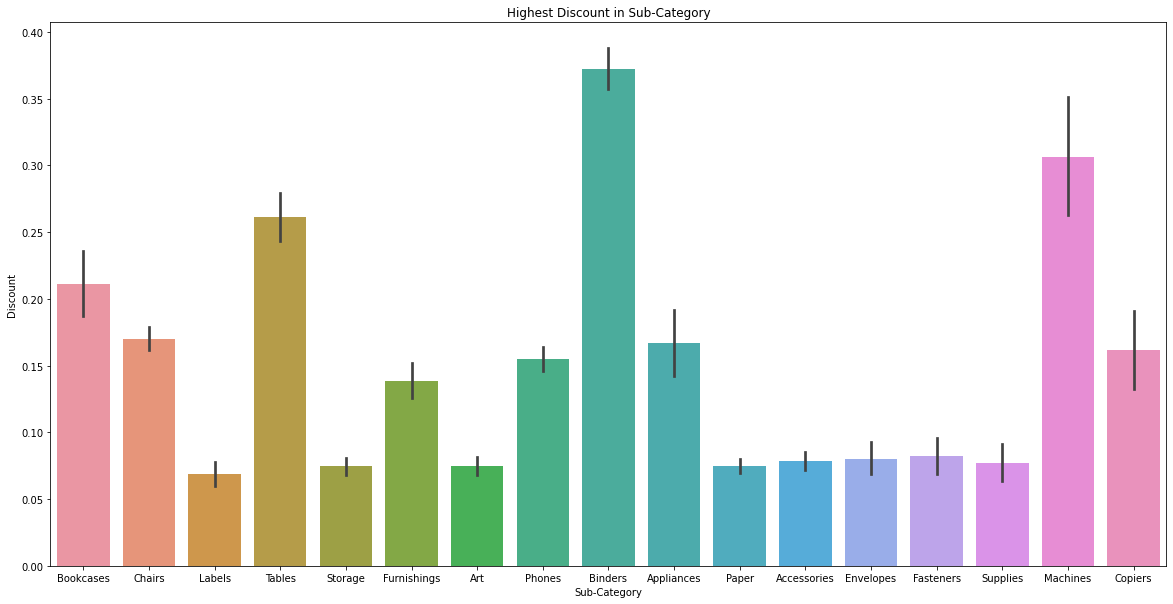

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x="Sub-Category",y="Discount",data=df)
plt.title("Highest Discount in Sub-Category")

In [ ]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


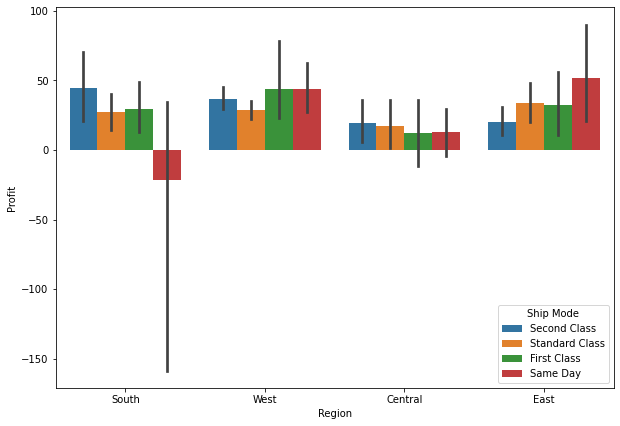

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x="Region",y="Profit",hue="Ship Mode",data=df)

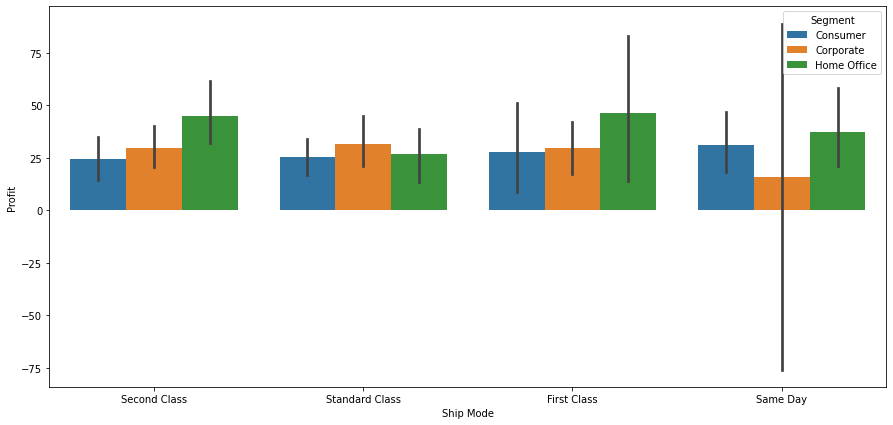

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x="Ship Mode",y="Profit",hue="Segment",data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

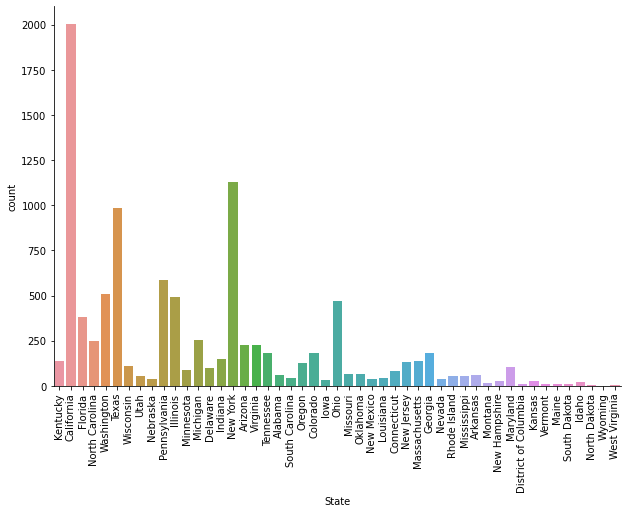

In [ ]:
#plt.figure(figsize=(20,5))
sns.catplot("State",kind="count",data=df,height=6,aspect=1.5)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Region with highest quantity')

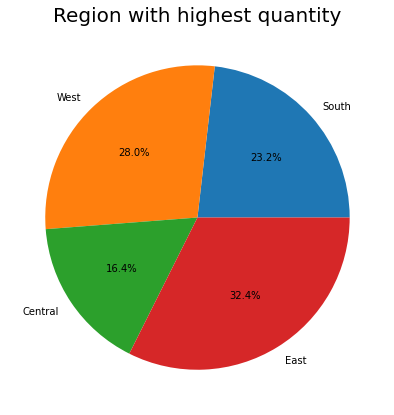

In [ ]:
region_quantity=df.groupby("Region")["Quantity"].sum().reset_index()
label=df["Region"].unique()
plt.figure(figsize=(7,7))
plt.pie(region_quantity["Quantity"],labels=label,autopct='%1.1f%%')
plt.title("Region with highest quantity",size=20)

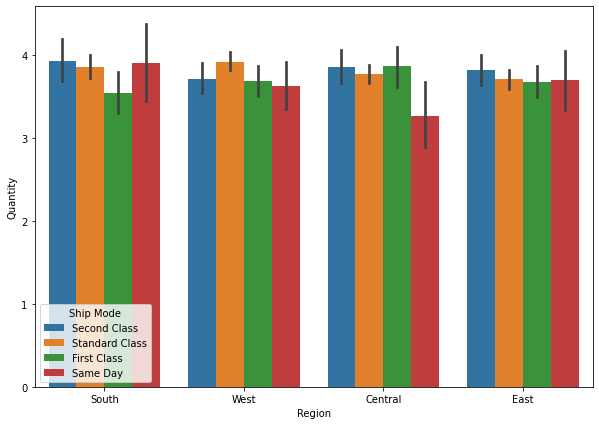

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x="Region",y="Quantity",hue="Ship Mode",data=df)

# **Category with respect to Quantity**

In [ ]:
cat_quantity=df.groupby("Category")["Quantity"].mean().reset_index()
cat_quantity

,Category,Quantity
0,Furniture,3.785007
1,Office Supplies,3.801195
2,Technology,3.756903


# **Top 10 Profit Cities**

<Figure size 720x504 with 0 Axes>

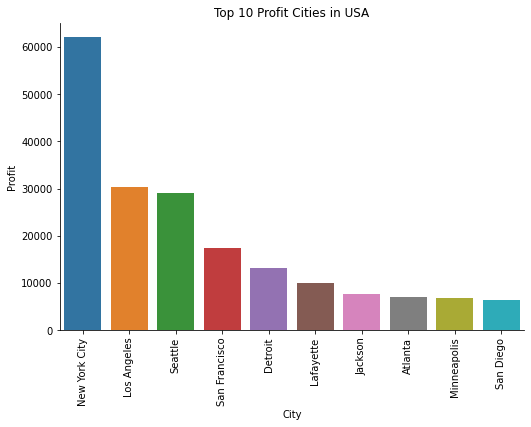

<Figure size 720x504 with 0 Axes>

In [ ]:
city_profit=df.groupby("City")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
top10_profit_city=city_profit.head(10)
sns.catplot(x="City",y="Profit",data=top10_profit_city,height=5,aspect=1.5,kind="bar")
plt.xticks(rotation=90,size=10)
plt.title("Top 10 Profit Cities in USA")
plt.figure(figsize=(10,7))

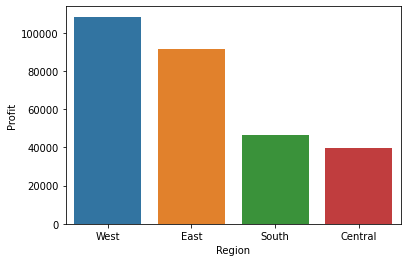

In [ ]:
region_profit=df.groupby("Region")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
sns.barplot(x="Region",y="Profit",data=region_profit)

West is the highest profit region

<Figure size 720x504 with 0 Axes>

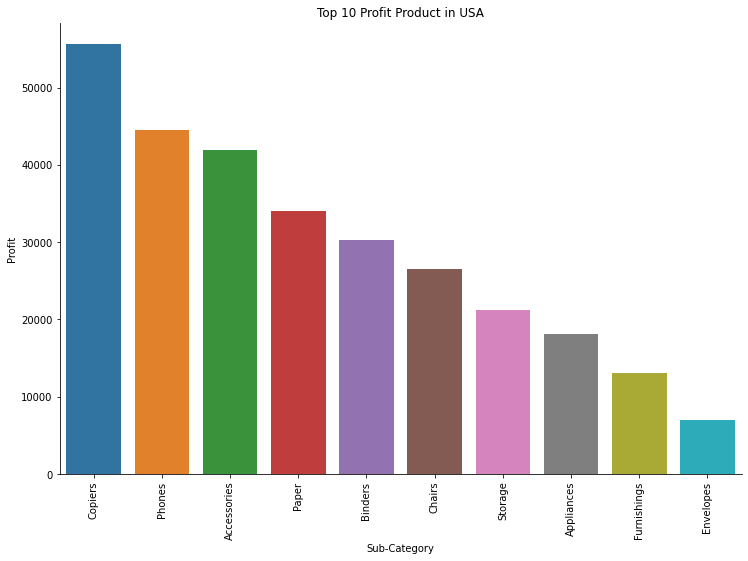

<Figure size 720x504 with 0 Axes>

In [ ]:
sub_category_profit=df.groupby("Sub-Category")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
top10_sub_category_profit_city=sub_category_profit.head(10)
sns.catplot(x="Sub-Category",y="Profit",data=top10_sub_category_profit_city,kind="bar",height=7,aspect=1.5)
plt.xticks(rotation=90,size=10)
plt.title("Top 10 Profit Product in USA")
plt.figure(figsize=(10,7))

Profit is gained more in Copiers, Phones and Accessories while the Furnishings, Appliances and Envelopes are on the lower end.